In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('bottle.csv')
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,T_degC,Salnty,RecInd,T_prec,S_prec,MeanAq,R_Depth,R_TEMP
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,10.50,33.440,3,1.0,2.0,9.0,0,10.50
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,10.46,33.440,3,2.0,2.0,9.0,8,10.46
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10.46,33.437,7,2.0,3.0,9.0,10,10.46
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,10.45,33.420,3,2.0,2.0,9.0,19,10.45
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,10.45,33.421,7,2.0,3.0,9.0,20,10.45


In [4]:
df_binary = df[['Salnty', 'T_degC']]
df_binary.columns = ['Sal', 'Temp']
df_binary.head()


,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


In [5]:
df_binary.fillna(method ='ffill', inplace = True)

C:\Users\Manisri\AppData\Local\Temp\ipykernel_8696\2592332255.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_binary.fillna(method ='ffill', inplace = True)
C:\Users\Manisri\AppData\Local\Temp\ipykernel_8696\2592332255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method ='ffill', inplace = True)


In [6]:
X = np.array(df_binary['Sal']).reshape(-1, 1)
y = np.array(df_binary['Temp']).reshape(-1, 1)


In [7]:
df_binary.dropna(inplace = True)

C:\Users\Manisri\AppData\Local\Temp\ipykernel_8696\2315153875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace = True)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
df.head()

0.20604716987243787


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,T_degC,Salnty,RecInd,T_prec,S_prec,MeanAq,R_Depth,R_TEMP
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,10.50,33.440,3,1.0,2.0,9.0,0,10.50
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,10.46,33.440,3,2.0,2.0,9.0,8,10.46
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10.46,33.437,7,2.0,3.0,9.0,10,10.46
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,10.45,33.420,3,2.0,2.0,9.0,19,10.45
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,10.45,33.421,7,2.0,3.0,9.0,20,10.45


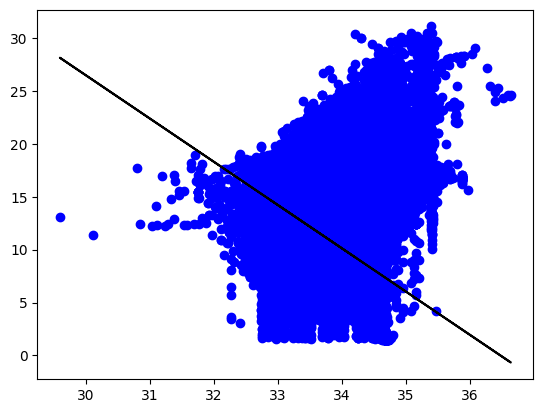

In [10]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()